In [175]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
import yfinance as yf

In [176]:
# SPDR S&P 500 ETF Trust
SPY = yf.download(tickers=['SPY'], start='2015-01-01', end='2025-01-01', auto_adjust=True)
SPY.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2024-12-24,597.729553,597.769355,591.934154,592.520677,33160100
2024-12-26,597.769348,598.902533,594.528696,595.940247,41219100
2024-12-27,591.476868,594.230439,587.252104,593.991813,64969300
2024-12-30,584.727173,588.226291,580.939799,584.399176,56578800
2024-12-31,582.599915,587.132835,580.949738,586.407129,57052700


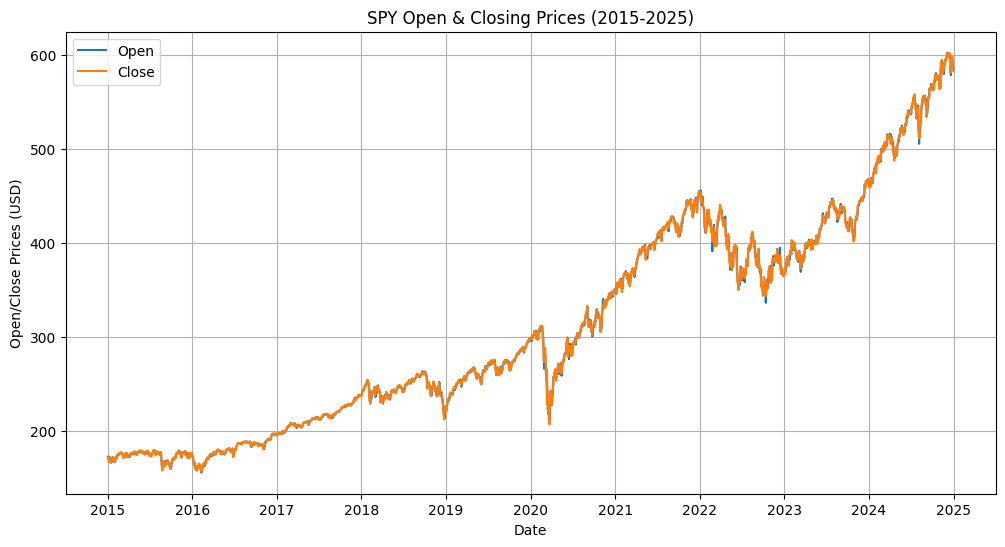

In [177]:
plt.figure(figsize=(12,6))
plt.plot(SPY.index, SPY['Open'], label='Open')
plt.plot(SPY.index, SPY['Close'], label='Close')
plt.title('SPY Open & Closing Prices (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Open/Close Prices (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
pass

In [178]:
SPY['Daily Return %'] = SPY['Close'].pct_change()
SPY['Daily Return $'] = SPY['Close'] - SPY['Open']

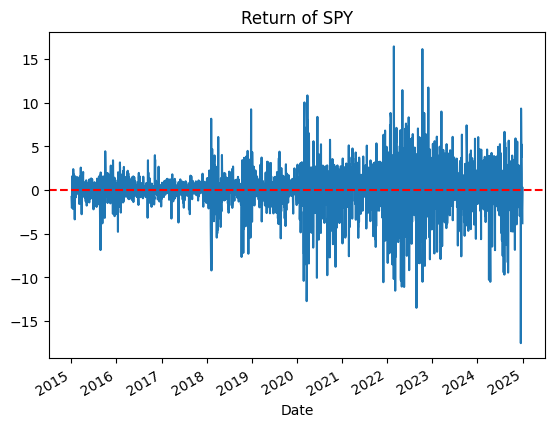

In [179]:
SPY['Daily Return $'].plot()
plt.title("Return of SPY")
plt.axhline(color='r', linestyle='--')
plt.show()

In [180]:
# Largest Daily Gain on 2024-12-18
SPY.loc[SPY['Daily Return $'].idxmin(), ['Close', 'Open']].to_dict(), SPY['Daily Return $'].idxmin()

({('Close', 'SPY'): 580.8438110351562, ('Open', 'SPY'): 598.3796413211339},
 Timestamp('2024-12-18 00:00:00'))

In [181]:
SPY['Cumulative Returns'] = SPY['Daily Return $'].cumsum()
SPY.sample(n=1)

Price,Close,High,Low,Open,Volume,Daily Return %,Daily Return $,Cumulative Returns
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2022-08-15,411.029114,411.556264,407.051666,407.109169,54048300,0.004121,3.919945,67.373363


In [182]:
SPY['SMA_20'] = SPY['Close'].rolling(20).mean()
SPY['SMA_50'] = SPY['Close'].rolling(50).mean()

SPY['Signal'] = 0
SPY.loc[SPY['SMA_20'] > SPY['SMA_50'], 'Signal'] = 1  # Buy signal
SPY.loc[SPY['SMA_20'] < SPY['SMA_50'], 'Signal'] = -1 # Sell signal

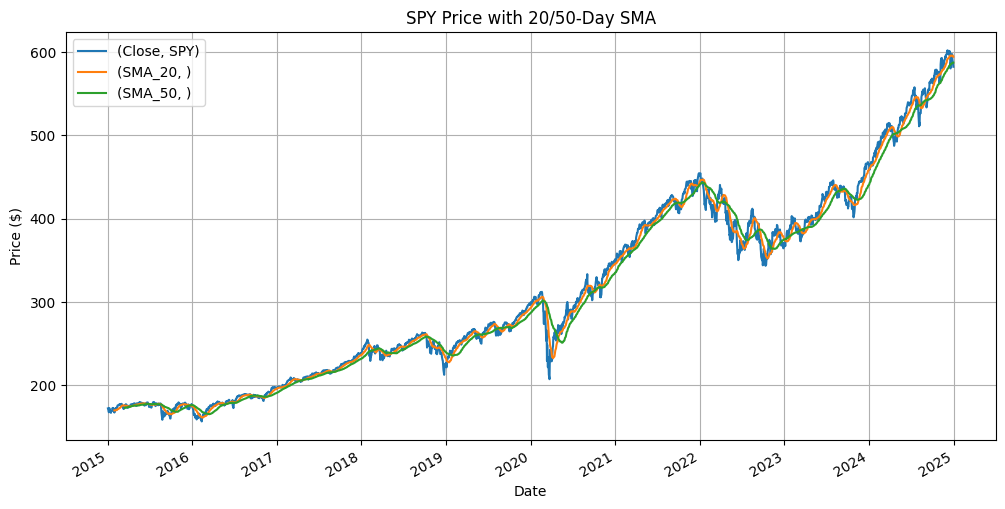

In [184]:
SPY[['Close', 'SMA_20', 'SMA_50']].plot(
    figsize=(12, 6),
    title="SPY Price with 20/50-Day SMA"
)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()